### Plot the distribution of BoxOffice collections in the combined dataset
### What is your inference?
### Are there any outliers? Who are they?


In [2]:
cursor = conn.cursor()

In [3]:
import sqlite3
import pandas as pd

conn = sqlite3.connect('bollywood_movies.sqlite')
df_sqlite = pd.read_sql_query("SELECT * FROM Movies", conn)

In [4]:
df_csv = pd.read_csv('indian_movies.csv')

In [5]:
df_csv.head()

,Unnamed: 0,MovieID,Title,Director,Genre,ReleaseYear,Budget (Crores),BoxOffice (Crores),Rating,Duration (minutes),LeadActor,LeadActress,Language,ProductionCompany
0,7,MOV008,Sarkar (Tamil),A. R. Murugadoss,Action Thriller,2005.0,NaN,NaN,7.5,173.0,Vijay,Keerthy Suresh,Tamil,Kalaignar TV
1,9,MOV010,2.0 (Tamil),S. Shankar,Science Fiction Action,2018.0,550.0,800.0,6.9,147.0,Rajinikanth,Amy Jackson,Tamil,Lyca Productions
2,21,MOV022,K.G.F: Chapter 1,Prashanth Neel,Action Drama,2018.0,50.0,250.0,7.9,156.0,Yash,Srinidhi Shetty,Kannada,Hombale Films
3,23,MOV024,Avengers: Endgame (Dubbed),"Anthony Russo, Joseph Russo",Superhero,2019.0,NaN,NaN,8.4,181.0,Robert Downey Jr.,Scarlett Johansson,"English (Dubbed in Telugu, Kannada, Hindi)",Marvel Studios
4,25,MOV026,Pailwaan,S. Krishna,Sports Action,2019.0,30.0,55.0,6.8,NaN,Sudeep,Aakanksha Singh,Kannada,RRR Motion Pictures


In [6]:
df_combined = pd.concat([df_sqlite, df_csv], ignore_index=True)

In [8]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 KB 4.6 MB/s eta 0:00:002.0 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


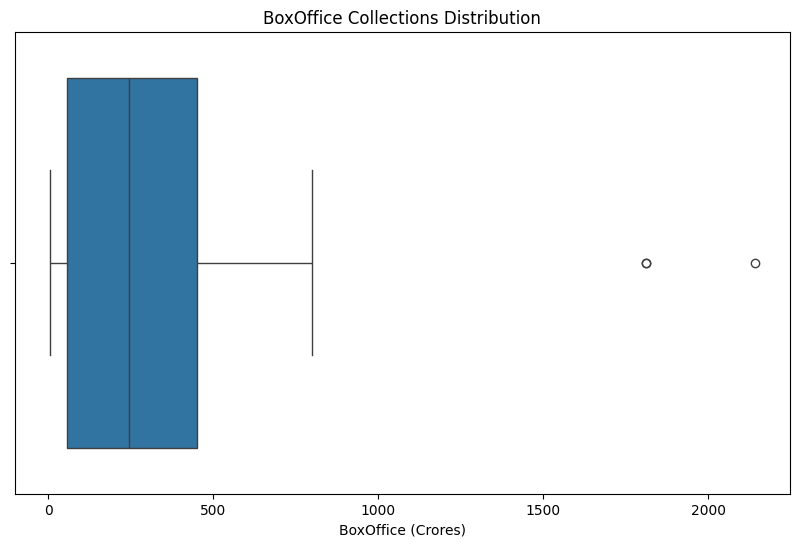

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop missing values in BoxOffice column
df_combined_clean = df_combined.dropna(subset=['BoxOffice (Crores)'])

# Plot distribution
plt.figure(figsize=(10,6))
sns.boxplot(data=df_combined_clean, x='BoxOffice (Crores)')
plt.title('BoxOffice Collections Distribution')
plt.xlabel('BoxOffice (Crores)')
plt.show()

In [10]:
Q1 = df_combined_clean['BoxOffice (Crores)'].quantile(0.25)
Q3 = df_combined_clean['BoxOffice (Crores)'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier threshold
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Get outliers
outliers = df_combined_clean[df_combined_clean['BoxOffice (Crores)'] > upper_bound]
print(outliers[['Title', 'BoxOffice (Crores)', 'Language']])

                          Title  BoxOffice (Crores) Language
3   Baahubali 2: The Conclusion              1810.0   Telugu
6                        Dangal              2140.0    Hindi
51  Baahubali 2: The Conclusion              1810.0   Telugu
